# **Giriş**
Potansiyeli olan bir dizi özellik belirledikten sonra, bunları geliştirmeye başlama zamanı gelmiştir. Bu derste, tamamen Pandas içinde yapabileceğiniz bir dizi yaygın dönüşümü öğreneceksiniz.

Bu derste çeşitli özellikler türlerine sahip dört veri kümesi kullanacağız: ABD Trafik Kazaları(accidents.csv), 1985 Otomobilleri(autos.csv), Beton Formülsayonu(concrete.csv), Müşteri yaşam boyu değeri(customer.csv). Aşağıdaki gizli hücre bunları yükler.

In [2]:
from enum import auto
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


plt.style.use('seaborn-v0_8')
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',titleweight='bold',titlesize=14, titlepad=10)

accidents = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/accidents.csv')
autos = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/autos.csv')
concrete = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/concrete.csv')
customer = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/customer.csv')


**Yeni Özellikleri Keşfetme İpuçları**

>>Özellikleri anlayın. Mevcutsa veri setinizin veri dökümantasyonuna başvurun.

>>Problem alanını araştırarak domain bilgisi edinin. Örneğin, ev fiyatlarını tahmin ediyorsanız emlak hakkında biraz araştırma yapın. Wikipedia iyi bir başlangıç olabilir ancak kitaplar ve dergi makaleleri genellikle en iyi bilgiyi sunar.

>>**Önceki çalışmaları inceleyin. Kaggle'daki geçmiş yarışmaların çözüm yazıları harika bir kaynaktır.**

>>Veri görselleştirmeyi kullanın. Görselleştirme, bir özelliğin dağılımındaki patolojileri veya basitleştirilebilecek karmaşık ilişkileri ortaya çıkarabilir. Özellik mühendisliği sürecinde verilerinizi görselleştirdiğinizden emin olun.

#**Matematiksel Dönüşümler**
Sayısal özellikler arasındaki ilişkiler çoğu zaman matematiksel formüllerle ifade edilir ve bunlar alan araştırmalarınızın çoğunda karşınıza çıkacaktır. Pandas'ta sütunlara sıradan sayılarmış gibi aritmetik işlemler uygulayabilirsiniz.

Otomobil veri kümesinde bir arabanın motorunu tanımlayan özellikler yer almaktadır. Araştırmalar, potansiyel olarak yararlı yeni özellikler oluşturmak için çeşitli formüller ortaya koymaktadır. Örneğin, "stroke ratio", bir motorun ne kadar verimli olduğunu ve ne kadar performanslı olduğunu ölçen bir parametredir:

In [3]:
autos['stroke_ratio'] = autos.stroke / autos.bore

autos[['stroke', 'bore', 'stroke_ratio']].head()

,stroke,bore,stroke_ratio
0,2.68,3.47,0.772334
1,2.68,3.47,0.772334
2,3.47,2.68,1.294776
3,3.40,3.19,1.065831
4,3.40,3.19,1.065831


Bir kombinasyon ne kadar karmaşıksa, bir modelin öğrenmesi o kadar zor olur; örneğin bir motorun gücünü ifade eden "silindir hacmin" için kullanılan şu formül gibi:

In [4]:
autos["displacement"] = (
    np.pi * ((0.5 * autos["bore"])**2) * autos["stroke"] * autos["num_of_cylinders"]
)

Veri görselleştirmesi, genellikle bir özelliğin üsler veya logaritma yoluyla "yeniden şekillendirilmesi" gibi dönüşümler önerebilir." Örneğin, ABD'deki kazalarda rüzgar hızının dağılımı oldukça çarpıktır. Bu durumda logaritma onu normalleştirmede etkilidir:

/tmp/ipython-input-2261002860.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(accidents.WindSpeed, shade=True, ax=axs[0])
/tmp/ipython-input-2261002860.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(accidents.LogWindSpeed, shade=True, ax=axs[1]);


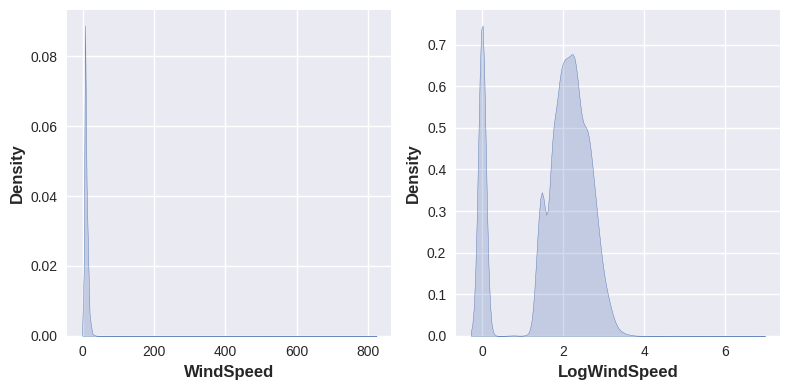

In [5]:
# Eğer özellik değeri 0.0 ise, np.log yerine np.log1p(log(1+x)) kullanın.
accidents['LogWindSpeed'] = accidents.WindSpeed.apply(np.log1p)

# Plot a comparison
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
sns.kdeplot(accidents.WindSpeed, shade=True, ax=axs[0])
sns.kdeplot(accidents.LogWindSpeed, shade=True, ax=axs[1]);

# Counts(Sayımlar)
Bir şeyin varlığı veya yokluğunu tanımlayan özellikler genellikle setler halinde gelir; örneğin, bir hastalığın risk faktörleri seti gibi. Bu tür özellikleri **sayaç** oluşturarak birleştirebilirsiniz.

Bu özellikler ikili (Var için `1`, Yok için `0`) veya boolean (Doğru(`True`) veya Yanlış(`False`)) olacaktır.

Trafik kazalarında, bazı yol nesnelerinin kazaya yakın olup olmadığını gösteren birkaç özellik vardır.Bu, toplam yol özelliği sayısını yakın çevrede toplama yöntemi kullanarak oluşturacaktır:

In [10]:
accidents.Amenity

,Amenity
0,False
1,False
2,False
3,False
4,False
...,...
99995,False
99996,False
99997,False
99998,False


In [11]:
roadway_features = ["Amenity", "Bump", "Crossing", "GiveWay",
    "Junction", "NoExit", "Railway", "Roundabout", "Station", "Stop",
    "TrafficCalming", "TrafficSignal"]
accidents["RoadwayFeatures"] = accidents[roadway_features].sum(axis=1)

accidents[roadway_features + ["RoadwayFeatures"]].head(10)

,Amenity,Bump,Crossing,GiveWay,Junction,NoExit,Railway,Roundabout,Station,Stop,TrafficCalming,TrafficSignal,RoadwayFeatures
0,False,False,False,False,False,False,False,False,False,False,False,False,0
1,False,False,False,False,False,False,False,False,False,False,False,False,0
2,False,False,False,False,False,False,False,False,False,False,False,False,0
3,False,False,False,False,False,False,False,False,False,False,False,False,0
4,False,False,False,False,False,False,False,False,False,False,False,False,0
5,False,False,False,False,True,False,False,False,False,False,False,False,1
6,False,False,False,False,False,False,False,False,False,False,False,False,0
7,False,False,True,False,False,False,False,False,False,False,False,True,2
8,False,False,True,False,False,False,False,False,False,False,False,True,2
9,False,False,False,False,False,False,False,False,False,False,False,False,0




Bir veri çerçevesinin yerleşik yöntemlerini kullanarak da boole değerleri oluştarabilirsiniz. Concrete veri kümesinde bir beton formülasyonundaki bileşenlerin miktarı yer almaktadır. Birçok formülde bir veya daha fazla bileşen eksiktir(yani bileşenin değeri 0'dır). Bu, veri çerçevesinin yerleşik greater-than (gt) yöntemiyle bir formüldeki bileşen sayısını sayacaktır.

In [12]:
components = [ "Cement", "BlastFurnaceSlag", "FlyAsh", "Water",
               "Superplasticizer", "CoarseAggregate", "FineAggregate"]
concrete["Components"] = concrete[components].gt(0).sum(axis=1)
concrete[components + ["Components"]].head(10)

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Components
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,5
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,5
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,5
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,5
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,5
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,5
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,5
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,5
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,5
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,4


# Özelliklerin Oluşturulması ve Sökülmesi

Çoğu zaman, daha basit parçalara ayrılabilecek karmaşık dizelerle karşılaşırsınız. Bazı yaygın örnekler:

* ID Numbers: `'123-45-6789'`
* Phone numbers: `'(999) 555-0123'`
* Street adress: `'8241 Kaggle Ln., Goose City, NV'`
* Internet adress: `'http://www.kaggle.com'`
* Product codes: `'0 36000 29145 2'`
* Dates and times: `'Mon Sep 30 07:06:05 2013'`

Bu tür özellikler genellikle kullanabileceğiniz bir tür yapıya sahiptir. Örneğin, ABD telefon numaralarında, arayanın konumunu belirten bir alan kodu(`'(999)'` kısmı) bulunur. Her zaman olduğu gibi, bu konuda biraz araştırma yapmak faydalı olabilir.

`str` erişim aracı, `split` gibi dize yöntemlerini doğrudan sütunlara uygulamanızı sağlar. The Customer Lifetime Value veri kümesi, bir sigorta şirketinin müşterilerini tanımlayan özellikleri içerir. `Policy` özelliğinden, `Type` ve `Level` Düzeyini birbirinden ayırabiliriz:

In [15]:
customer[["Type", "Level"]] = (
    customer["Policy"]
    .str
    .split(" ", expand=True)
)

customer[["Policy", "Type", "Level"]].head(10)

,Policy,Type,Level
0,Corporate L3,Corporate,L3
1,Personal L3,Personal,L3
2,Personal L3,Personal,L3
3,Corporate L2,Corporate,L2
4,Personal L1,Personal,L1
5,Personal L3,Personal,L3
6,Corporate L3,Corporate,L3
7,Corporate L3,Corporate,L3
8,Corporate L3,Corporate,L3
9,Special L2,Special,L2


Kombinasyonda bir etkileşim olduğunu düşünüyorsanız, basit özellikleri birleştirilmiş bir özellikte birleştirebilirsiniz:

In [16]:
autos["make_and_style"] = autos["make"] + "_" + autos["body_style"]
autos[["make", "body_style", "make_and_style"]].head()

,make,body_style,make_and_style
0,alfa-romero,convertible,alfa-romero_convertible
1,alfa-romero,convertible,alfa-romero_convertible
2,alfa-romero,hatchback,alfa-romero_hatchback
3,audi,sedan,audi_sedan
4,audi,sedan,audi_sedan


Kaggle Learn'in diğer bölümlerinde

Burada bahsetmediğimiz, özellikle bilgi açısından zengin birkaç başka veri türü daha var. Neyse ki, biz sizi bu konuda da bilgilendireceğiz.

* **Tarih ve saatler** için, Veri Temizleme kursu [tarihleri ayrıştırma bölümüne](https://www.kaggle.com/alexisbcook/parsing-dates) bakın.
* **Enlem ve boylamlar** için [Coğrafi analiz](https://www.kaggle.com/learn/geospatial-analysis) kursumuza bakın

# Grup Dönüşümleri

Son olarak, bazı kategorilere göre gruplandırılmış birden çok satırdaki bilgileri bir araya getiren Grup dönüşümleri vardır. Grup dönüştürme ile şu gibi özellikler oluşturabilirsiniz: "bir kişinin ikamet ettiği eyaletteki ortalama gelir" veya "hafta içi günlerinde yayınlanan filmlerin türe göre oranı". Bir kategori etkileşimi keşfettiyseniz, o kategori üzerinde bir grup dönüşümü araştırmak faydalı olabilir.


---


Bir toplama işlevi kullanarak, grup dönüşümü iki özelliği birleştirir: gruplandırmayı sağlayan kategorik bir özellik ve değerlerini toplamak istediğiniz başka bir özellik. "Eyalete göre ortalama gelir" için, gruplama özelliği olarak `State`'i, toplama işlevi olarak `mean`'yı ve toplanan özellik olarak `Income`'i seçersiniz. Bunu Pandas'ta hesaplamak için `groupby` ve `transform` yöntemleri kullanırız:



In [17]:
customer["AverageIncome"] = (
    customer.groupby("State")  # for each state
    ["Income"]                 # select the income
    .transform("mean")         # and compute its mean
)

customer[["State", "Income", "AverageIncome"]].head(10)

,State,Income,AverageIncome
0,Washington,56274,38122.733083
1,Arizona,0,37405.402231
2,Nevada,48767,38369.605442
3,California,0,37558.946667
4,Washington,43836,38122.733083
5,Oregon,62902,37557.283353
6,Oregon,55350,37557.283353
7,Arizona,0,37405.402231
8,Oregon,14072,37557.283353
9,Oregon,28812,37557.283353


Ortalama işlevi, yerleşik bir veri çerçevesi yöntemidir, yani dönüştürmek için bir dize olarak aktarabiliriz. Diğer kullanışlı yöntemler arasında max, min, median, var, std ve count bulunur. Veri kümesinde her bir durumun ortaya çıkma sıklığını şu şekilde hesaplayabilirsiniz:

In [18]:
customer["StateFreq"] = (
    customer.groupby("State")
    ["State"]
    .transform("count")
    / customer.State.count()
)

customer[["State", "StateFreq"]].head(10)

,State,StateFreq
0,Washington,0.087366
1,Arizona,0.186446
2,Nevada,0.096562
3,California,0.344865
4,Washington,0.087366
5,Oregon,0.284760
6,Oregon,0.284760
7,Arizona,0.186446
8,Oregon,0.284760
9,Oregon,0.284760


Kategorik bir özellik için "frekans kodlaması" oluşturmak için bu tür bir dönüşüm kullanabilirsiniz. Eğitim ve doğrulama bölümlerini kullanıyorsanız, bunların bağımsızlığını korumak için en iyisi, yalnızca eğitim kümesini kullanarak gruplandırılmış bir özellik oluşturmak ve ardından bunu doğrulama kümesine eklemektir. Eğitim kümesinde `drop_duplicates` ile benzersiz bir değer kümesi oluşturduktan sonra, doğrulama kümesinin birleştirme yöntemini kullanabiliriz:

In [19]:
# Create splits
df_train = customer.sample(frac=0.5)
df_valid = customer.drop(df_train.index)

# Create the average claim amount by coverage type, on the training set
df_train["AverageClaim"] = df_train.groupby("Coverage")["ClaimAmount"].transform("mean")

# Merge the values into the validation set
df_valid = df_valid.merge(
    df_train[["Coverage", "AverageClaim"]].drop_duplicates(),
    on="Coverage",
    how="left",
)

df_valid[["Coverage", "AverageClaim"]].head(10)

,Coverage,AverageClaim
0,Basic,383.593417
1,Basic,383.593417
2,Basic,383.593417
3,Premium,657.400204
4,Extended,477.343036
5,Basic,383.593417
6,Basic,383.593417
7,Premium,657.400204
8,Basic,383.593417
9,Basic,383.593417


**Özellik Oluşturma İpuçları**
Özellik oluştururken modelinizin kendi güçlü ve zayıf yönlerini göz önünde bulundurmanızda fayda vardır. İşte bazı kılavuzlar:
* Doğrusal modeller toplamları ve farkları doğal olarak öğrenir, ancak daha karmaşık şeyleri öğrenemez.
* Oranlar çoğu model için öğrenmesi zor gibi görünüyor. Oran kombinasyonları genellikle bazı kolay performans kazançlarına yol açar.
* Doğrusal modeller ve sinir ağları genellikle normalleştirilmiş özelliklerle daha iyi sonuç verir. Sinir ağları özellikle 0'dan çok uzak olmayan değerlere ölçeklendirilmiş özelliklere ihtiyaç duyar. Ağaç tabanlı modeller (rastgele ormanlar ve XGBoost gibi) bazen normalizasyondan faydalanabilir, ancak genellikle çok daha az fayda sağlar.
* Ağaç modelleri, neredeyse tüm özellik kombinasyonlarını yaklaşık olarak öğrenebilir, ancak bir kombinasyon özellikle önemli olduğunda, özellikle veriler sınırlı olduğunda, bu kombinasyonun açıkça oluşturulmasından yararlanabilirler.
* Sayımlar, ağaç modelleri için özellikle yararlıdır, çünkü bu modeller birçok özelliği aynı anda bir araya getirmenin doğal bir yoluna sahip değildir.